## Import all libraries

In [ ]:
import numpy as np                 # For Numerical Calculation
import pandas as pd                # For Data Manipulation
import matplotlib.pyplot as plt    # For Data Visualization
import seaborn as sns              # For Data Visualization
%matplotlib inline

sns.set()         # Setting styles of the plot to Seaborn


In [ ]:
# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

## load dataset

In [ ]:
path='/content/drive/MyDrive/DATASET_CAR/car_prices.csv'

In [ ]:
# load the dataset

df=pd.read_csv(path)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Checking the Size of the Dataset

In [ ]:
df.shape

(558837, 16)

## Checking the columns in the Dataset

In [ ]:
df.columns.to_list()

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate']

# Data Cleaning
Now, we clean our data by dropping the irrelevant columns, handling the wrong datatypes, handling the null values and the outliers.

## Dropping Irrelevant Columns

In [ ]:
# here vin, state, selldate are irrrlavent for the probelm solution
df.drop(['vin','state','saledate'],axis=1,inplace=True)
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


## Checking and Handling the Datatypes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   condition     547017 non-null  float64
 7   odometer      558743 non-null  float64
 8   color         558088 non-null  object 
 9   interior      558088 non-null  object 
 10  seller        558837 non-null  object 
 11  mmr           558799 non-null  float64
 12  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 55.4+ MB


## Checking for Null Values

In [ ]:
# Checking the number of null values columnwise
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

In [ ]:
# Checking of Percentage of Null values in Each Column
(df.isna().sum() / df.shape[0]) * 100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
dtype: float64

Here, we can see that columns odometer, color, interior, seller, mmr,
 sellingprice have less number of null values as compared to rate column. So, we can drop that null values.

In [ ]:
# Here, we dropping the null values from the columns having lesser number of null values
df=  df[df['odometer'].notna()]
df=  df[df['interior'].notna()]
df=  df[df['seller'].notna()]
df=  df[df['mmr'].notna()]
df=  df[df['sellingprice'].notna()]
df=  df[df['color'].notna()]
df['transmission'].fillna(df['transmission'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

year                0
make            10282
model           10375
trim            10630
body            13165
transmission        0
condition       11638
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
dtype: int64

## Handling Null values in Rate Column
As the rate column has greater number of null values, dropping them leads to losing the a large amount of data. So, instead of dropping it, we will impute with either mean, mode or median.

In [ ]:
df['condition'] = df['condition'].fillna(df['condition'].median())
df['make'].fillna('other',inplace=True)
df['model'].fillna('other',inplace=True)
df['trim'].fillna('other',inplace=True)
df['body'].fillna('other',inplace=True)


In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

## Data Visualization
Now, we visualize our data based on different parameters to understand the relations and some insights from out dataset.

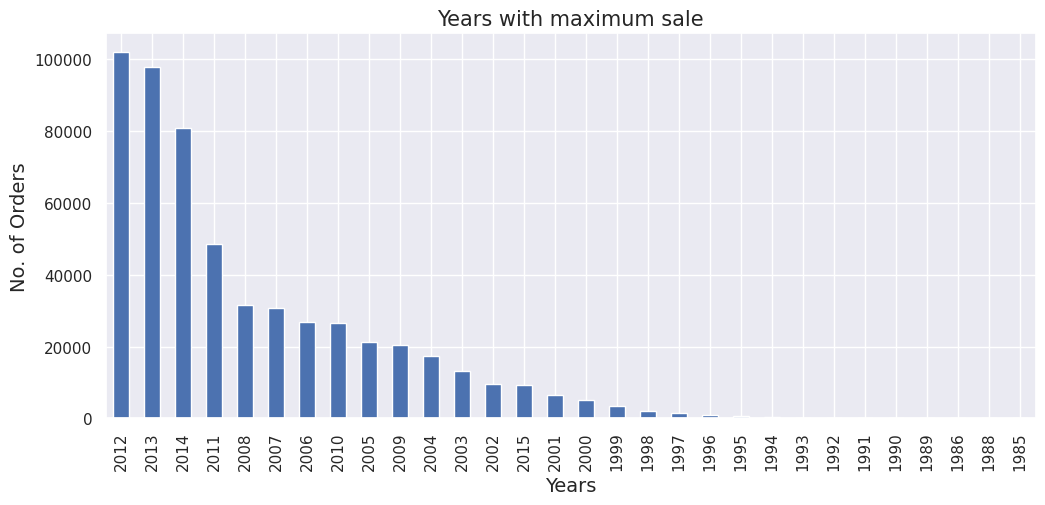

In [ ]:
# Checking for the Restaurants got higher number of orders
plt.figure(figsize = (12,5))
data = df['year'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('Years', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Years with maximum sale", fontsize=15)
plt.show()

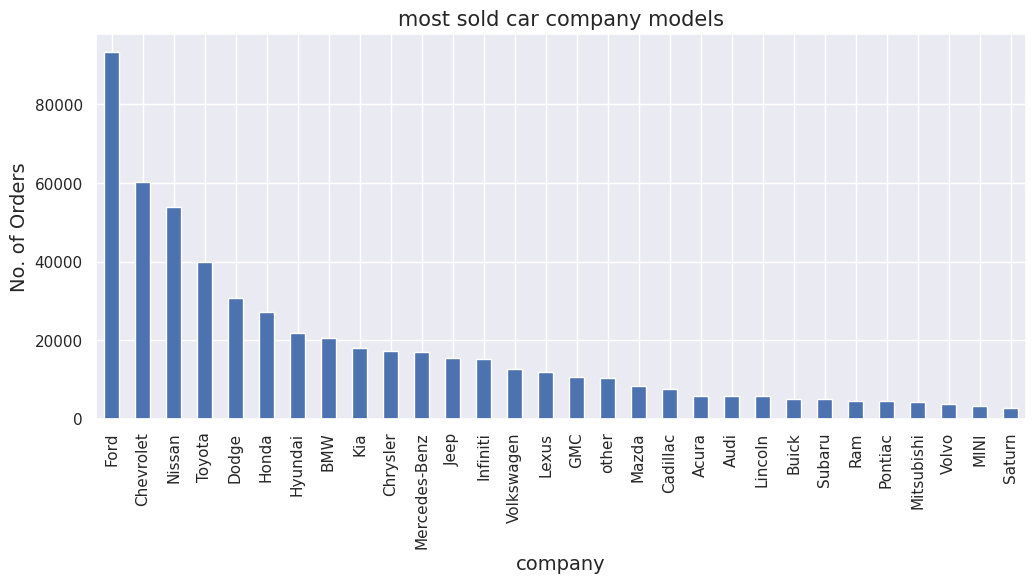

In [ ]:
# Checking for the comapny cars with higher number of orders
plt.figure(figsize = (12,5))
data = df['make'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('company', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("most sold car company models", fontsize=15)
plt.show()

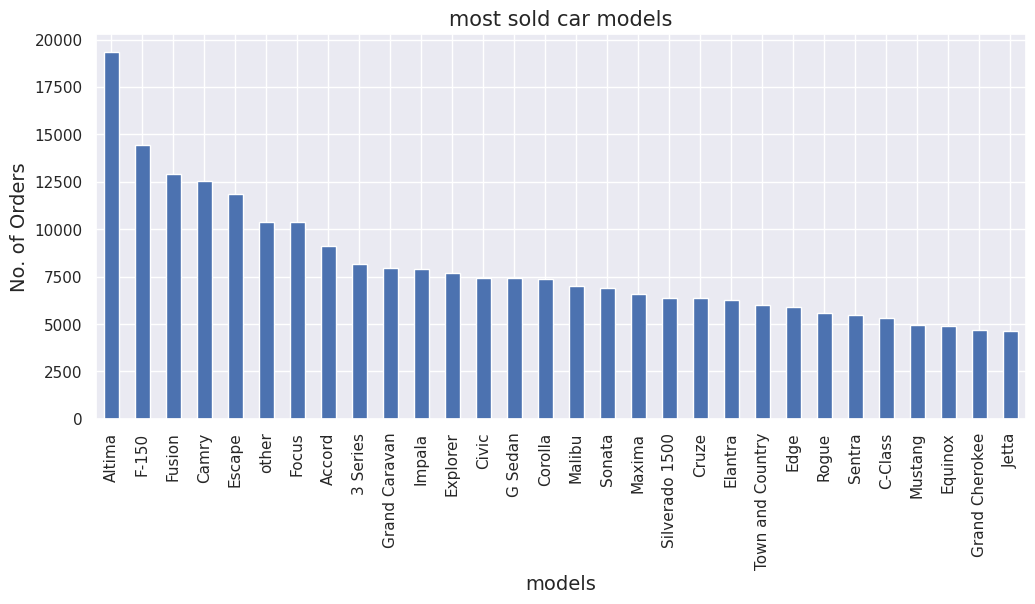

In [ ]:
# Checking for the comapny cars with highest sold models
plt.figure(figsize = (12,5))
data = df['model'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('models', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("most sold car models", fontsize=15)
plt.show()

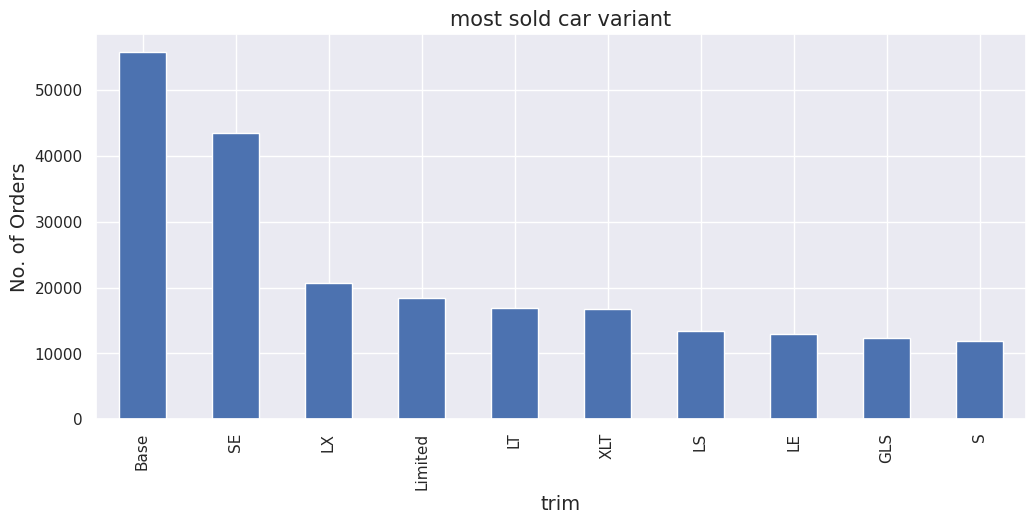

In [ ]:
# Checking for the comapny cars with highest trim
plt.figure(figsize = (12,5))
data = df['trim'].value_counts()[:10]
data.plot(kind = 'bar')
plt.xlabel('trim', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("most sold car variant", fontsize=15)
plt.show()

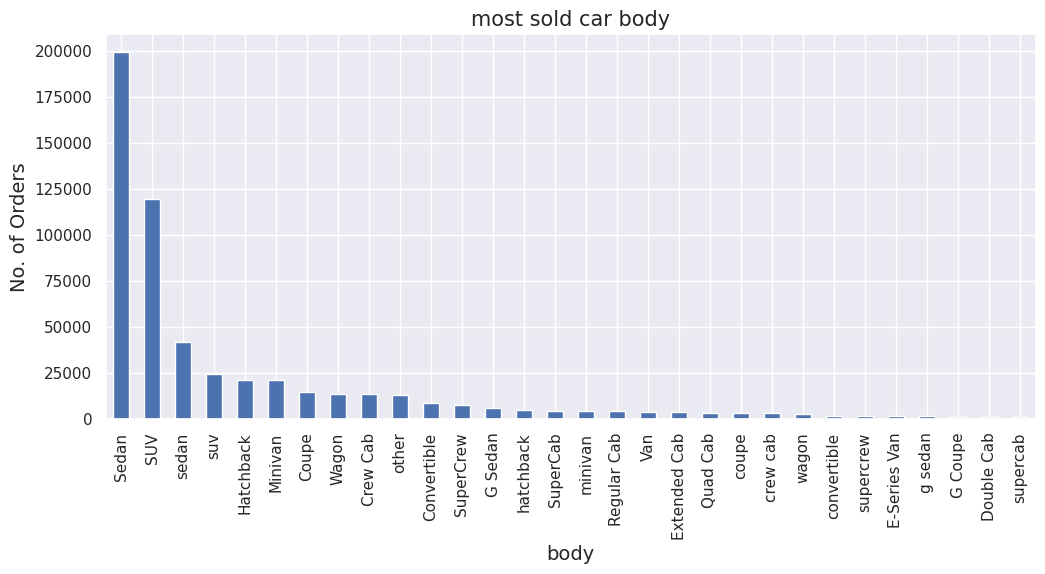

In [ ]:
# Checking for the comapny cars with highest sold models based on body
plt.figure(figsize = (12,5))
data = df['body'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('body', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("most sold car body", fontsize=15)
plt.show()

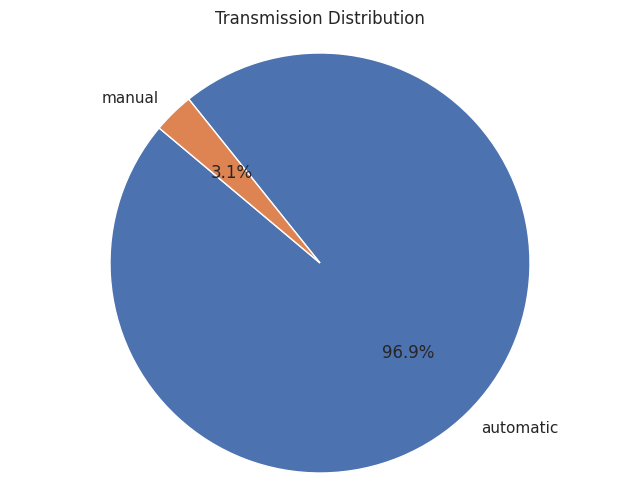

In [ ]:
transmission_counts = df['transmission'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Distribution')
plt.axis('equal')
plt.show()

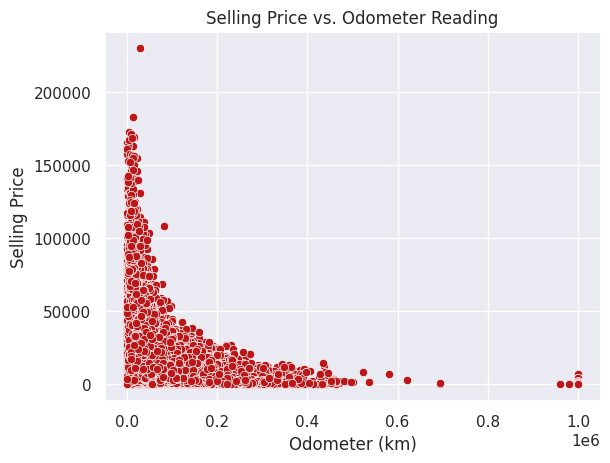

In [ ]:
# selling price vs odometer reading
sns.scatterplot(df, x="odometer", y="sellingprice", color="#bc1618")
plt.xlabel("Odometer (km)")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Odometer Reading")
plt.grid(True)

plt.show()

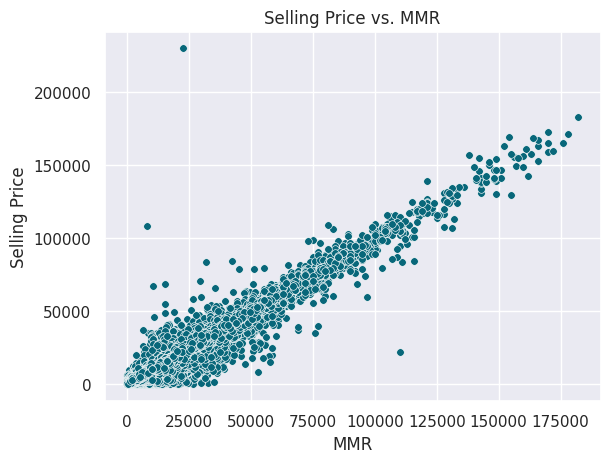

In [ ]:
# selling price vs mmr reading
sns.scatterplot(df, x="mmr", y="sellingprice", color="#08677a", s=30)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.grid(True)

plt.show()

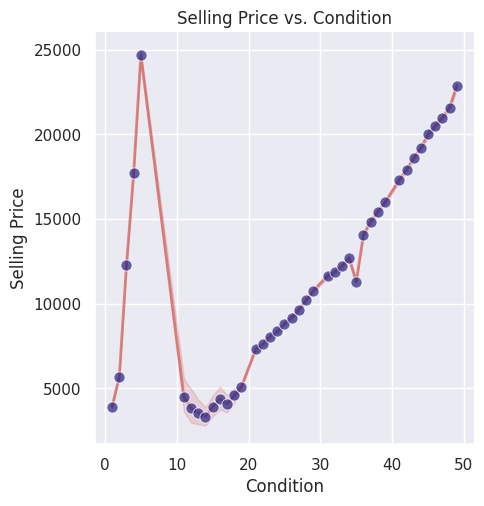

In [ ]:
sns.relplot(
    x="condition",
    y="sellingprice",
    color="#d15b56",
    kind="line",
    data=df,
    linewidth=2,
    marker="o",
    markersize=8,
    alpha=0.7,
    dashes=False,
    legend="full",
    markerfacecolor="#262182",
)


plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Condition")


plt.show()

In [ ]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0



### transmission
replace automatic-1 manual-0

In [ ]:
df['transmission'] = df['transmission'].replace({"automatic": 1, "manual" : 0})
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,1,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,1,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,1,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,1,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,1,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [ ]:
df['transmission'].value_counts()

transmission
1    540443
0     17520
Name: count, dtype: int64

In [ ]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission      int64
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
dtype: object

# Model Builing

In [ ]:

df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df = df.dropna(how='any',axis=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df["make"] = LabelEncoder().fit_transform(df["make"])
df["body"] = LabelEncoder().fit_transform(df["body"])
df["color"] = LabelEncoder().fit_transform(df["color"])
df["interior"] = LabelEncoder().fit_transform(df["interior"])
df["transmission"] = LabelEncoder().fit_transform(df["transmission"])
df["model"] = LabelEncoder().fit_transform(df["model"])
df["trim"] = LabelEncoder().fit_transform(df["trim"])
df["seller"] = LabelEncoder().fit_transform(df["seller"])


df.head(5)

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,32,716,1186,40,1,5.0,16639.0,17,1,7191,20500.0,21500.0
1,2015,32,716,1186,40,1,5.0,9393.0,17,0,7191,20800.0,21500.0
2,2014,5,9,279,37,1,45.0,1331.0,7,1,4970,31900.0,30000.0
3,2015,65,658,1616,37,1,41.0,14282.0,17,1,13779,27500.0,27750.0
4,2014,5,41,494,37,1,43.0,2641.0,7,1,4970,66000.0,67000.0


In [ ]:
X = df.drop("sellingprice", axis = 1)
y = df["sellingprice"]



In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas")
X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)

X_scaled.head(5)

,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,mmr
0,1.000000,0.484848,0.841363,0.628844,0.888889,1.0,0.083333,0.016638,0.894737,0.0625,0.504773,0.112515
1,1.000000,0.484848,0.841363,0.628844,0.888889,1.0,0.083333,0.009392,0.894737,0.0000,0.504773,0.114164
2,0.969697,0.075758,0.010576,0.147932,0.822222,1.0,0.916667,0.001330,0.368421,0.0625,0.348870,0.175161
3,1.000000,0.984848,0.773208,0.856840,0.822222,1.0,0.833333,0.014281,0.894737,0.0625,0.967219,0.150982
4,0.969697,0.075758,0.048179,0.261930,0.822222,1.0,0.875000,0.002640,0.368421,0.0625,0.348870,0.362550


## train test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y, test_size = 0.3,
    random_state = 10
)

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
print("train score: ", round(reg.score(X_train, y_train) * 100, 2), "%")


train score:  96.95 %


In [ ]:
print("test score: ", round(reg.score(X_test, y_test) * 100, 2), "%")


test score:  97.09 %


In [ ]:
y_pred = reg.predict(X_test)
y_pred

dataset = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
dataset.reset_index(drop=True).round(2).head(10)

,Actual Price,Predicted Price
0,3100.0,2959.21
1,14600.0,13813.81
2,31000.0,31487.80
3,15800.0,14608.13
4,11800.0,12226.35
5,5000.0,4738.41
6,34100.0,36041.33
7,24750.0,25541.19
8,2250.0,3606.82
9,21400.0,21623.24
